In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [17]:
df = pd.read_csv('stud.csv')

In [18]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [19]:
X= df.drop(columns=['total score'],axis=1)
X

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000
998,female,group D,some college,standard,completed,68,78,77,74.333333


In [20]:
y= df['total score']

In [31]:
y

0      218
1      247
2      278
3      148
4      229
      ... 
995    282
996    172
997    195
998    223
999    249
Name: total score, Length: 1000, dtype: int64

In [21]:
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

num_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,cat_features),
        ("StandardScaler",num_transformer,num_features)
    ]
)

In [22]:
X= preprocessor.fit_transform(X)


In [23]:
X.shape

(1000, 21)

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 21), (200, 21), (800,), (200,))

In [25]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(true, predicted)
    return mae, mse, rmse, r2

In [27]:
models ={
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoostRegressor": AdaBoostRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae, model_train_mse, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    
    print(list(models.keys())[i]) 
    model_list.append(list(models.keys())[i])
    
    print("Model Performance For Training Set")
    print("RMSE: {}".format(model_train_rmse))
    print("MAE: {}".format(model_train_mae))
    print("MSE: {}".format(model_train_mse))
    print("R2 Score: {}".format(model_train_r2))

    print("-"*40)
    
    print("Model Performance For Test Set")
    print("RMSE: {}".format(model_test_rmse))
    print("MAE: {}".format(model_test_mae))
    print("MSE: {}".format(model_test_mse))
    print("R2 Score: {}".format(model_test_r2))
    
    r2_list.append(model_test_r2)
    
    print("\n")

Linear Regression
Model Performance For Training Set
RMSE: 3.149315860494583e-14
MAE: 2.2009061240169104e-14
MSE: 9.918190389162737e-28
R2 Score: 1.0
----------------------------------------
Model Performance For Test Set
RMSE: 2.948538326740849e-14
MAE: 2.0818902157770937e-14
MSE: 8.693878264259726e-28
R2 Score: 1.0


Lasso
Model Performance For Training Set
RMSE: 1.0090307814984023
MAE: 0.8075024891061073
MSE: 1.0181431180112765
R2 Score: 0.9994328035509327
----------------------------------------
Model Performance For Test Set
RMSE: 1.0557262026572933
MAE: 0.831174438327183
MSE: 1.1145578149771884
R2 Score: 0.999422299105941


Ridge
Model Performance For Training Set
RMSE: 0.017594120102506324
MAE: 0.01425131902728447
MSE: 0.00030955306218141714
R2 Score: 0.9999998275513584
----------------------------------------
Model Performance For Test Set
RMSE: 0.01932265226355842
MAE: 0.014683893416676242
MSE: 0.00037336489049839936
R2 Score: 0.9999998064764087


K-Neighbors Regressor
Model P

In [28]:
## Results
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name','R2 Score']).sort_values(by='R2 Score',ascending=False)

,Model Name,R2 Score
0,Linear Regression,1.000000
2,Ridge,1.000000
1,Lasso,0.999422
4,Decision Tree,0.997859
6,XGBRegressor,0.997429
5,Random Forest,0.995935
7,CatBoosting Regressor,0.994960
8,AdaBoostRegressor,0.988093
3,K-Neighbors Regressor,0.966842


In [29]:
#Linear Regression

lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(score)

100.0


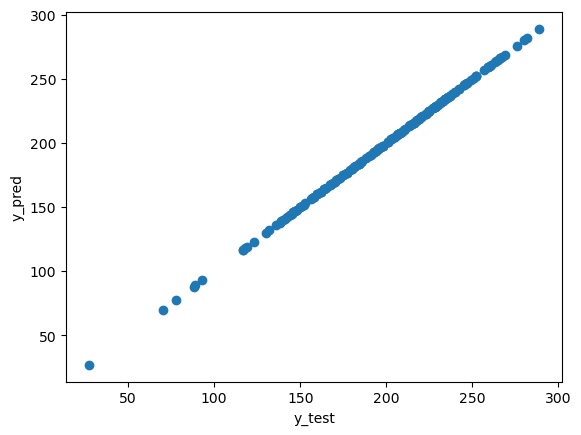

In [30]:
plt.scatter(y_test,y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [33]:
pred_df = pd.DataFrame({'Actual':y_test,'Predicted':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual,Predicted,Difference
521,261,261.0,5.684342e-14
737,192,192.0,0.000000e+00
740,225,225.0,2.842171e-14
660,224,224.0,0.000000e+00
411,245,245.0,2.842171e-14
...,...,...,...
408,165,165.0,-2.842171e-14
332,171,171.0,0.000000e+00
208,231,231.0,0.000000e+00
613,216,216.0,2.842171e-14
